This code implements the adaptive Kalman filter for a scalar system with an unknown measurement noise covariance matrix R.

The filter is based on the work in "Adaptive Kalman Filter for Detectable Linear Time-Invariant Systems" by Moghe, Zanetti and Akella at https://arc.aiaa.org/doi/full/10.2514/1.G004359.

Begin by importing NumPy and Matplotlib, defining the system parameters F, H, Q, R, the number of timesteps to simulate T, and initializing the state estimate x_post, state estimate error covariance P_post, the measurement noise covariance estimate R_est, and the measurement error covariance L.

In [1]:
import numpy as np, numpy.random as npr, matplotlib.pyplot as plt
F, H, Q, R = 0.5, 1, 3, 5
x_post, P_post, R_est, L = 0, 10, 10, 0
x = npr.randn()
T = 100000
R_est_history = np.zeros(T)

Run the adaptive Kalman filter iterations.

In [2]:
for k in range(T):
    w,v = Q**0.5*npr.randn(), R**0.5*npr.randn()
    ynew = H*x + v
    if k > 0:
        Mopi = 1/H
        Z = Mopi*ynew-F*Mopi*yold
        L = L*(k-1)/k + Z*Z/k
        Ai, Bi = 1, np.array([-F*Mopi,Mopi])
        kronA, kronB = Ai**2, Bi[0]**2+Bi[1]**2
        S = np.copy(kronB)
        CW = kronA*Q
        R_est_new = (L-CW)/S
        if R_est_new > 0: R_est = R_est_new
    R_est_history[k] = R_est
    x_pre  = F*x_post
    P_pre  = F*P_post*F + Q
    K      = P_pre*H/(H*P_pre*H+R_est)
    x_post = x_pre + K*(ynew-H*x_pre)
    IKH    = 1 - K*H
    P_post = IKH*P_pre*IKH + K*R*K
    x = F*x + w
    yold = np.copy(ynew)
    if not (k+1) % 1000: print('k = %8d: R_true = %8.6f, R_est = %8.6f' % (k+1,R,R_est))

k =        1: R_true = 5.000000, R_est = 10.000000
k =        2: R_true = 5.000000, R_est = 10.000000
k =        3: R_true = 5.000000, R_est = 10.000000
k =        4: R_true = 5.000000, R_est = 1.131709
k =        5: R_true = 5.000000, R_est = 0.928002
k =        6: R_true = 5.000000, R_est = 2.227139
k =        7: R_true = 5.000000, R_est = 1.499403
k =        8: R_true = 5.000000, R_est = 1.031674
k =        9: R_true = 5.000000, R_est = 2.115900
k =       10: R_true = 5.000000, R_est = 2.067626
k =       11: R_true = 5.000000, R_est = 1.764131
k =       12: R_true = 5.000000, R_est = 1.390475
k =       13: R_true = 5.000000, R_est = 1.081102
k =       14: R_true = 5.000000, R_est = 1.640867
k =       15: R_true = 5.000000, R_est = 1.551541
k =       16: R_true = 5.000000, R_est = 1.301237
k =       17: R_true = 5.000000, R_est = 1.744259
k =       18: R_true = 5.000000, R_est = 1.705974
k =       19: R_true = 5.000000, R_est = 1.486632
k =       20: R_true = 5.000000, R_est = 1.3098

Plot the results of the estimation error of R. The log-log plot shows convergence to the true value, albeit at a slow roughly geometric rate.

Text(0.5, 1.0, 'Estimation error of R vs time step')

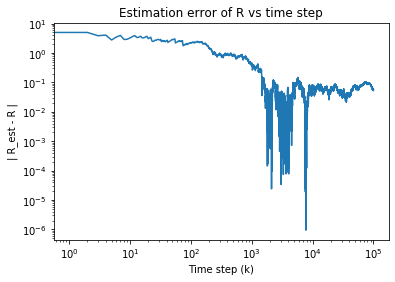

In [3]:
plt.loglog(np.abs(R_est_history-R))
plt.xlabel("Time step (k)")
plt.ylabel("| R_est - R |")
plt.title("Estimation error of R vs time step")